#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

# 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [2]:
# Loading the data 
digits = datasets.load_digits()
#digits

In [3]:
digits['data'].shape

(1797, 64)

In [4]:
digits['target'].shape

(1797,)

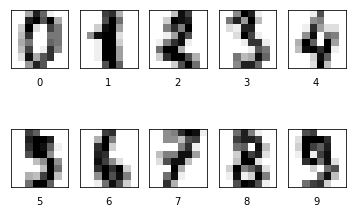

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [65]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [66]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


# 3- Architecture of the neural network

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [9]:
import numpy as np

In [10]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    
    s = 1 / (1 + np.exp(-z))
    
    return s

In [11]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [68]:
 #Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector

    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.ones(shape=(dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [13]:
initialize_parameters(6)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), 0)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X^T*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [126]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    #m = X.shape[1]
    #A = sigmoid(np.dot(w.T, X)+b)
    
    m = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)
    A = A.reshape(1, -1)       #reshape(1, -1)把A变成一行
    Y = Y.reshape(1, -1)
    
    #cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 
    
    #dw = (1 / m) * np.dot(X, (A - Y).T)
    #db = (1 / m) * np.sum(A - Y)
    
    cost = -1/m * np.sum(Y * np.log(A + pow(10.0, -9)) + (1-Y) * np.log(1-A + pow(10.0, -9)))  # 为防止A 接近于0或1，导致log(A)或log(1-A) 趋于无穷，
                                                                                                       #所以在分母上加上一个很小的正数pow(10.0, -9)
    dw = 1/m * np.dot((A-Y), X).T
    db = 1/m * np.sum(A-Y)
    
    
    assert(dw.shape == w.shape)         # assert（断言）用于判断一个表达式，在表达式条件为 false 的时候触发异常。
    assert(db.dtype == float)
    cost = np.squeeze(cost)      #从数组的形状中删除单维度条目，即把shape中为1的维度去掉
    assert(cost.shape == ())  # shape是否不存在
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost


##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [70]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [71]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    #m = X.shape[1]
    #Y_prediction = np.zeros((1,m))
    #w = w.reshape(X.shape[0],1)
    
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    
    
    #A = sigmoid(np.dot(w.T, X) + b)
    
    A = sigmoid(np.dot(X, w) + b)
    
    # Convert probabilities a[0,i] to actual predictions p[0,i]
    #for i in range(A.shape[1]):
        #Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0 
        
    A[A > 0.5] = 1
    A[A <= 0.5] = 0
    
    Y_prediction = A.reshape(1, -1)
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [72]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=False):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    #w, b = initialize_parameters(X_train.shape[0])
    #params, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
     # Initial parms
    dim = X_train.shape[1]
    w, b = initialize_parameters(dim)
    
    # Training
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w, b = params['w'], params['b']
    
    #w = params["w"]
    #b = params["b"]
    
    #Y_prediction_test = predict(w, b, X_test)
    #Y_prediction_train = predict(w, b, X_train)
    
    # Accuracy
    def acc(y, y_predict):
        diff = y - y_predict
        correct = diff[diff == 0] # if same, the difference equals 0
        return correct.shape[0] / y.shape[0]
    train_predict = predict(w, b, X_train)
    test_predict = predict(w, b, X_test)
    training_accuracy = acc(Y_train, train_predict)
    test_accuracy = acc(Y_test, test_predict) 
        
        
        
    #d = {"w" : w, 
       #  "b" : b,
       #  "training_accuracy": 100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100,
       #  "test_accuracy":100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100,
       #  "costs": costs}
    
    result = {
        'w': w,
        'b': b,
        'training_accuracy': training_accuracy,
        'test_accuracy': test_accuracy,
        'cost': costs
    }
    
    return result

In [121]:
model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.027, print_cost = True)

Cost after iteration 0: 10.307786
Cost after iteration 100: 2.149854
Cost after iteration 200: 0.553378
Cost after iteration 300: 3.176410
Cost after iteration 400: 0.496948
Cost after iteration 500: 0.450021
Cost after iteration 600: 0.625566
Cost after iteration 700: 0.494025
Cost after iteration 800: 0.442430
Cost after iteration 900: 0.418623
Cost after iteration 1000: 2.412186
Cost after iteration 1100: 0.452118
Cost after iteration 1200: 0.419887
Cost after iteration 1300: 0.422639
Cost after iteration 1400: 0.807578
Cost after iteration 1500: 0.431905
Cost after iteration 1600: 0.405220
Cost after iteration 1700: 1.088513
Cost after iteration 1800: 0.457793
Cost after iteration 1900: 0.414193


{'w': array([[ 1.        ],
        [ 0.57661321],
        [-0.04056217],
        [-0.08185471],
        [ 0.37874694],
        [ 0.23556679],
        [ 0.37515644],
        [ 0.3378487 ],
        [ 1.06567206],
        [-0.47039296],
        [ 0.32630471],
        [ 0.25044988],
        [-0.18821365],
        [-0.13620437],
        [ 0.00616782],
        [ 0.21608217],
        [ 0.91604427],
        [ 0.24312445],
        [ 0.41927225],
        [ 0.01326065],
        [-0.52527613],
        [-0.19332854],
        [-0.4213113 ],
        [ 0.26042316],
        [ 0.94762966],
        [-0.62247053],
        [ 0.06799904],
        [ 0.41862861],
        [ 0.04020543],
        [ 0.52137738],
        [-0.48765387],
        [ 0.90079267],
        [ 1.        ],
        [-0.74973642],
        [ 0.0457833 ],
        [ 0.50590142],
        [-0.25631171],
        [-0.1697371 ],
        [ 0.19589731],
        [ 1.        ],
        [ 0.96907708],
        [-0.04271462],
        [ 0.15549503],
      

In [122]:
# test on data
result = model(X_train, y_train, X_test, y_test, 5000, 1e-2, True)

Cost after iteration 0: 10.307786
Cost after iteration 100: 1.903098
Cost after iteration 200: 1.020255
Cost after iteration 300: 0.672823
Cost after iteration 400: 0.513754
Cost after iteration 500: 0.438843
Cost after iteration 600: 0.400175
Cost after iteration 700: 0.377251
Cost after iteration 800: 0.361694
Cost after iteration 900: 0.349945
Cost after iteration 1000: 0.340442
Cost after iteration 1100: 0.332474
Cost after iteration 1200: 0.325680
Cost after iteration 1300: 0.319839
Cost after iteration 1400: 0.314790
Cost after iteration 1500: 0.310401
Cost after iteration 1600: 0.306559
Cost after iteration 1700: 0.303168
Cost after iteration 1800: 0.300149
Cost after iteration 1900: 0.297437
Cost after iteration 2000: 0.294980
Cost after iteration 2100: 0.292735
Cost after iteration 2200: 0.290668
Cost after iteration 2300: 0.288755
Cost after iteration 2400: 0.286972
Cost after iteration 2500: 0.285303
Cost after iteration 2600: 0.283734
Cost after iteration 2700: 0.282254
Cos

In [123]:
result

{'w': array([[ 1.        ],
        [ 0.38695522],
        [-0.02712665],
        [-0.02144246],
        [ 0.13428207],
        [ 0.10108807],
        [ 0.1344045 ],
        [ 0.30377088],
        [ 1.04116109],
        [-0.22424999],
        [ 0.14702575],
        [ 0.07037573],
        [-0.08031491],
        [-0.05797374],
        [ 0.02547056],
        [ 0.04192524],
        [ 0.91996537],
        [ 0.10769472],
        [ 0.14915031],
        [ 0.00592056],
        [-0.21469981],
        [-0.07658699],
        [-0.18328746],
        [ 0.13433819],
        [ 0.94430718],
        [-0.25506869],
        [ 0.04645866],
        [ 0.15433828],
        [ 0.01107361],
        [ 0.20684869],
        [-0.18721906],
        [ 0.88192283],
        [ 1.        ],
        [-0.29375792],
        [ 0.01833299],
        [ 0.21346155],
        [-0.08170148],
        [-0.06088989],
        [ 0.07738952],
        [ 1.        ],
        [ 0.92443895],
        [ 0.01390082],
        [ 0.0448074 ],
      

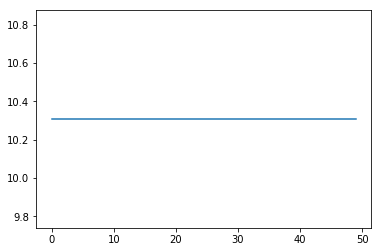

In [133]:
cos = model(X_train, y_train, X_test, y_test, 5000, 1e-5, False)['cost']
plt.plot(range(len(cos)), cos)

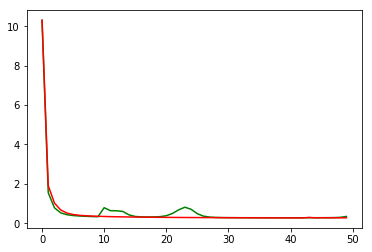

In [144]:
cos = model(X_train, y_train, X_test, y_test, 5000, 0.013, False)['cost']
plt.plot(range(len(cos)), cos,color='green')
co = model(X_train, y_train, X_test, y_test, 5000, 0.01, False)['cost']
plt.plot(range(len(co)), co,color='red')

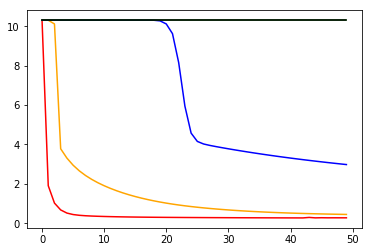

In [127]:
lrs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
colors = ['red', 'orange', 'blue', 'green', 'black']
for lr, c in zip(lrs, colors):
    cost = model(X_train, y_train, X_test, y_test, 5000, lr, False)['cost']
    plt.plot(range(len(cost)), cost, color=c)

lr为1e-5和1e-6 的cost曲线完全重合，学习率太小，cost没有变化，是一条水平直线

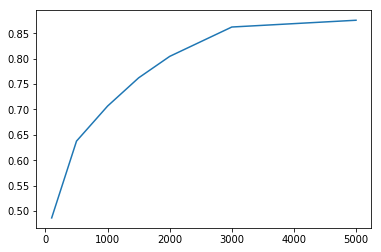

In [135]:
iteration_nums = [100, 500, 1000, 1500, 2000, 3000, 5000]
test_acc = []
for iteration_num in iteration_nums:
    test_acc.append(model(X_train, y_train, X_test, y_test, iteration_num, 1e-3, False)['test_accuracy'])
plt.plot(iteration_nums, test_acc);

# 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

In [23]:
# test on data
result = model(X_train, y_train, X_test, y_test, 5000, 1e-2, True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: 0.372817
Cost after iteration 700: 0.353011
Cost after iteration 800: 0.339421
Cost after iteration 900: 0.329155
Cost after iteration 1000: 0.320933
Cost after iteration 1100: 0.314117
Cost after iteration 1200: 0.308350
Cost after iteration 1300: 0.303408
Cost after iteration 1400: 0.299132
Cost after iteration 1500: 0.295401
Cost after iteration 1600: 0.292117
Cost after iteration 1700: 0.289198
Cost after iteration 1800: 0.286579
Cost after iteration 1900: 0.284206
Cost after iteration 2000: 0.282036
Cost after iteration 2100: 0.280035
Cost after iteration 2200: 0.278177
Cost after iteration 2300: 0.276440
Cost after iteration 2400: 0.274808
Cost after iteration 2500: 0.273268
Cost after iteration 2600: 0.271810
Cost after iteration 2700: 0.270423
Cost after iteration 2800: 0.26910

In [24]:
result

{'w': array([[ 1.        ],
        [ 0.34423602],
        [ 0.0732716 ],
        [ 0.00638637],
        [ 0.09981748],
        [ 0.11250117],
        [ 0.20988473],
        [ 0.30359159],
        [ 1.07413485],
        [-0.28383285],
        [ 0.16574755],
        [ 0.05273001],
        [-0.03844984],
        [-0.04184192],
        [-0.0618251 ],
        [ 0.16911841],
        [ 0.93178081],
        [ 0.11649205],
        [ 0.1475157 ],
        [-0.04163371],
        [-0.24523065],
        [-0.07023067],
        [-0.19390106],
        [ 0.24913561],
        [ 0.94496747],
        [-0.19593674],
        [ 0.03707193],
        [ 0.1921937 ],
        [ 0.0068915 ],
        [ 0.22612153],
        [-0.23654312],
        [ 0.88839207],
        [ 1.        ],
        [-0.262938  ],
        [-0.02211101],
        [ 0.22130884],
        [-0.09522628],
        [-0.06716125],
        [ 0.09161677],
        [ 1.        ],
        [ 0.89877007],
        [-0.01168584],
        [ 0.0683078 ],
      

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


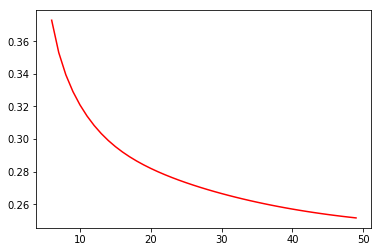

In [25]:
lrs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
colors = ['red', 'orange', 'blue', 'green', 'black']
for lr, c in zip(lrs, colors):
    cost = model(X_train, y_train, X_test, y_test, 5000, lr, False)['cost']
    plt.plot(range(len(cost)), cost, color=c)

##### 4.2 Observe the effect of iteration_num on the test accuracy.

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


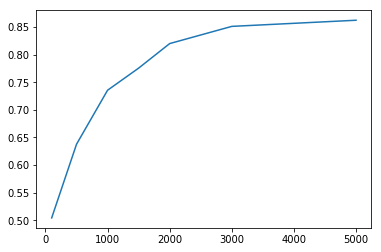

In [26]:
iteration_nums = [100, 500, 1000, 1500, 2000, 3000, 5000]
test_acc = []
for iteration_num in iteration_nums:
    test_acc.append(model(X_train, y_train, X_test, y_test, iteration_num, 1e-3, False)['test_accuracy'])
plt.plot(iteration_nums, test_acc);

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

In [27]:
#change the activate function into softmax

### Keras

In [28]:
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [29]:
model = Sequential()
# model.add(Dense(32, activation='sigmoid', input_dim=64))
# model.add(Dense(10, activation='softmax', input_dim=32))

model.add(Dense(10, activation='softmax', input_dim=64))

In [30]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.25)

In [34]:
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
1347/1347 [==============================] - 4s 3ms/step - loss: 3.2328 - accuracy: 0.4892 
Epoch 2/100
1347/1347 [==============================] - 0s 80us/step - loss: 0.6944 - accuracy: 0.8114
Epoch 3/100
1347/1347 [==============================] - 0s 102us/step - loss: 0.4574 - accuracy: 0.8745
Epoch 4/100
1347/1347 [==============================] - 0s 93us/step - loss: 0.2911 - accuracy: 0.9087
Epoch 5/100
1347/1347 [==============================] - 0s 105us/step - loss: 0.2341 - accuracy: 0.9228
Epoch 6/100
1347/1347 [==============================] - 0s 94us/step - loss: 0.2079 - accuracy: 0.9406
Epoch 7/100
1347/1347 [==============================] - 0s 35us/step - loss: 0.1754 - accuracy: 0.9465
Epoch 8/100
1347/1347 [==============================] - 0s 35us/step - loss: 0.1618 - accuracy: 0.9451
Epoch 9/100
1347/1347 [==============================] - 0s 55us/step - loss: 0.1408 - accuracy: 0.9517
Epoch 10/100
1347/1347 [==============================] - 0s 4

1347/1347 [==============================] - 0s 143us/step - loss: 0.0193 - accuracy: 0.9978
Epoch 80/100
1347/1347 [==============================] - 0s 76us/step - loss: 0.0194 - accuracy: 0.9985
Epoch 81/100
1347/1347 [==============================] - 0s 59us/step - loss: 0.0188 - accuracy: 0.9985
Epoch 82/100
1347/1347 [==============================] - 0s 54us/step - loss: 0.0183 - accuracy: 0.9993
Epoch 83/100
1347/1347 [==============================] - 0s 53us/step - loss: 0.0204 - accuracy: 0.9963
Epoch 84/100
1347/1347 [==============================] - 0s 53us/step - loss: 0.0177 - accuracy: 0.9993
Epoch 85/100
1347/1347 [==============================] - 0s 57us/step - loss: 0.0180 - accuracy: 0.9985
Epoch 86/100
1347/1347 [==============================] - 0s 53us/step - loss: 0.0173 - accuracy: 0.9970
Epoch 87/100
1347/1347 [==============================] - 0s 57us/step - loss: 0.0180 - accuracy: 0.9985
Epoch 88/100
1347/1347 [==============================] - 0s 55us/s

In [35]:
model.evaluate(X_test, Y_test)

450/450 [==============================] - 0s 75us/step


[0.19705839037895204, 0.948888897895813]

In [36]:
model.predict_classes(np.array([X_test[2]]))[0] == Y_test[2]

True

In [37]:
model.predict_classes(X_test)

array([6, 9, 8, 3, 8, 8, 5, 9, 7, 5, 1, 2, 0, 8, 0, 9, 7, 1, 0, 8, 0, 8,
       3, 4, 5, 3, 8, 1, 3, 3, 5, 2, 9, 7, 3, 3, 3, 4, 6, 7, 2, 2, 2, 3,
       8, 7, 8, 4, 9, 1, 1, 9, 5, 0, 1, 2, 0, 3, 5, 3, 1, 9, 0, 8, 3, 1,
       9, 1, 0, 1, 8, 3, 5, 0, 4, 7, 9, 6, 3, 4, 0, 4, 6, 7, 2, 1, 1, 9,
       4, 6, 9, 4, 0, 6, 0, 5, 1, 3, 7, 6, 3, 3, 1, 5, 7, 1, 6, 0, 2, 8,
       6, 7, 9, 0, 2, 3, 0, 3, 4, 0, 5, 7, 4, 4, 3, 6, 5, 6, 9, 7, 3, 4,
       7, 9, 3, 4, 4, 2, 1, 5, 0, 2, 0, 7, 7, 6, 2, 3, 7, 9, 9, 8, 2, 5,
       7, 4, 7, 5, 3, 9, 2, 6, 7, 2, 6, 7, 5, 8, 2, 0, 6, 3, 1, 0, 9, 3,
       8, 6, 9, 3, 1, 3, 2, 6, 6, 2, 7, 0, 6, 7, 2, 5, 8, 7, 0, 7, 3, 7,
       2, 9, 0, 4, 3, 1, 6, 1, 3, 6, 4, 6, 7, 2, 0, 5, 7, 2, 8, 1, 1, 8,
       2, 9, 6, 8, 5, 4, 5, 9, 5, 3, 4, 4, 5, 7, 9, 5, 5, 1, 8, 1, 0, 8,
       7, 6, 5, 5, 3, 5, 1, 2, 6, 7, 5, 4, 0, 2, 1, 8, 4, 8, 1, 6, 7, 9,
       5, 0, 1, 3, 3, 0, 4, 2, 6, 9, 2, 4, 0, 5, 8, 0, 6, 6, 3, 8, 3, 8,
       7, 7, 2, 7, 1, 0, 4, 6, 6, 4, 9, 6, 6, 7, 9,

In [38]:
Y_test

array([6, 9, 8, 3, 8, 8, 5, 9, 7, 5, 1, 2, 0, 8, 0, 9, 7, 1, 0, 8, 0, 8,
       3, 4, 5, 3, 8, 1, 3, 3, 5, 2, 9, 7, 3, 3, 3, 4, 6, 7, 2, 2, 2, 3,
       8, 7, 8, 4, 9, 1, 1, 9, 3, 0, 1, 2, 0, 3, 5, 3, 1, 9, 0, 8, 3, 1,
       5, 1, 0, 1, 8, 3, 9, 0, 4, 7, 3, 6, 3, 4, 0, 4, 6, 7, 2, 1, 1, 9,
       4, 6, 3, 4, 0, 6, 0, 5, 1, 3, 7, 6, 3, 3, 1, 5, 7, 1, 6, 0, 2, 8,
       6, 7, 9, 0, 2, 3, 0, 3, 4, 0, 5, 7, 4, 4, 3, 6, 5, 6, 9, 7, 3, 4,
       5, 9, 3, 4, 4, 2, 1, 5, 0, 2, 0, 7, 7, 6, 2, 3, 7, 7, 9, 8, 1, 5,
       7, 4, 7, 5, 3, 9, 2, 6, 7, 2, 6, 7, 5, 8, 2, 0, 6, 3, 1, 9, 5, 3,
       8, 6, 9, 3, 1, 8, 2, 6, 6, 2, 7, 0, 6, 7, 2, 5, 8, 7, 0, 7, 3, 7,
       2, 9, 0, 4, 3, 1, 6, 1, 3, 6, 4, 6, 7, 2, 0, 5, 7, 2, 8, 1, 1, 8,
       2, 9, 6, 8, 5, 9, 5, 5, 5, 3, 4, 4, 5, 7, 9, 5, 5, 1, 8, 1, 0, 8,
       7, 6, 3, 5, 3, 5, 1, 2, 6, 7, 5, 4, 0, 2, 1, 8, 4, 8, 1, 6, 7, 9,
       5, 0, 1, 3, 3, 0, 4, 2, 6, 9, 2, 4, 0, 5, 8, 0, 6, 6, 3, 8, 3, 8,
       7, 7, 2, 7, 1, 0, 4, 6, 6, 4, 9, 6, 6, 7, 9,

#### 以下是手动实现：

> 1.用softmax代替sigmoid为激活函数
 2. 把y = i 转化为 y[i] = 1, 其他为0 (如y=2 -> y=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
 3. w.shape = [dim of X, 10]
 4. 导数计算:
     - softmax


In [64]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [40]:
def transfer(y):
    after = []
    for e in y:
        new = [0] * 10
        new[e] = 1
        after.append(new)
    return np.array(after)

In [41]:
y_train_ = transfer(y_train)
y_test_ = transfer(y_test)

In [42]:
from sklearn.utils import resample
def digits_recognization(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost=True):
    """
    Params:
        X_train, y_train, X_test, y_test: training data and test data
        num_iterations: number of iterations
        learning_rate: the step of parameters change in every iteration
        print_cost: True of False
        
    Returns:
        result: A dict of training result
        predict_model: A function that accept a digit graph and return the predict number based on this algorithm
    """
    
    def softmax_func(x: np.array):
        x -= np.max(x)
        return np.exp(x) / np.sum(np.exp(x))
    
    def propagate_func(X, y, w, b):
        # z = wX + b
        # a = softmax(z)
        assert(X.shape[1] == w.shape[0])
        S = softmax_func(np.dot(X, w) + b)
        assert(S.shape == y.shape)
        m = X.shape[0]
        # cost_func: L = -1/m * \sum (y_i * log(S_i))
        cost = -1/m * np.sum(y * np.log(S))
        # partial
        dw = 1/m * np.dot(X.T, (S - y))
        db = 1/m * np.sum(S - y, axis=0).reshape(1, -1)
        assert(dw.shape == w.shape)
        assert(db.shape == b.shape)
        
        grads = {
            'dw': dw,
            'db': db
        }
        
        return grads, cost
    
    def optimize_func(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost):
        # initialize params
        w = np.random.rand(X_train.shape[1], 10) * 1e-4
        b = np.random.rand(1, 10) * 1e-4
        accuracy_and_cost = {
            'train_cost': [],
            'train_acc': [],
            'test_cost': [],
            'test_acc': []
        }
        batch_size = 100
        steps_per_iter = X_train.shape[0] // batch_size
        for i in range(num_iterations):
            cost = 0
            for j in range(steps_per_iter):
                X_batch, y_batch = resample(X_train, y_train, n_samples=batch_size)
                grads, batch_cost = propagate_func(X_batch, y_batch, w, b)
            
                dw = grads['dw']
                db = grads['db']
            
                w -= learning_rate * dw
                b -= learning_rate * db
                
                cost += batch_cost
            if i % 100 == 0:
                train_acc, train_cost = accuracy_cost_func(X_train, y_train, w, b)
                test_acc, test_cost = accuracy_cost_func(X_test, y_test, w, b)
                accuracy_and_cost['train_acc'].append(train_acc)
                accuracy_and_cost['train_cost'].append(train_cost)
                accuracy_and_cost['test_cost'].append(test_cost)
                accuracy_and_cost['test_acc'].append(test_acc)
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost / steps_per_iter))
        
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': b
        }
        return params, grads, accuracy_and_cost
    
    def accuracy_cost_func(x, y, w, b):
        S = softmax_func(np.dot(x, w) + b)
        m = x.shape[0]
        cost = -1/m * np.sum(y * np.log(S))
        y_predict = []
        for s in S:
            s[s == np.max(s)] = 1
            s[s < 1] = 0
            y_predict.append(s)
        y_predict = np.array(y_predict)
        
        diff = y - y_predict
        
        correct = 0
        total = 0
        for e in diff:
            if (e == 0).all():
                correct += 1
            total += 1
        return correct / total, cost
    
    params, grads, acc_and_cost = optimize_func(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost)
    
    result = {
        'w': params['w'],
        'b': params['b'],
        'accuracy and cost': acc_and_cost
    }
    def predict_model(x, y):
        plt.imshow(x.reshape([8,8]),cmap=plt.cm.gray_r)
        S = softmax_func(np.dot(x, params['w']) + params['b']).tolist()[0]
        y_predict = S.index(max(S))
        print('The predict value is {}, the real digit is {}'.format(y_predict, y))
    
    return result, predict_model

In [43]:
result, predict = digits_recognization(X_train, y_train_, X_test, y_test_, 5000, 1e-6 / 2)

Cost after iteration 0: 6.907452
Cost after iteration 100: 6.874733
Cost after iteration 200: 6.842119
Cost after iteration 300: 6.810265
Cost after iteration 400: 6.779594
Cost after iteration 500: 6.750905
Cost after iteration 600: 6.718911
Cost after iteration 700: 6.691453
Cost after iteration 800: 6.671803
Cost after iteration 900: 6.639084
Cost after iteration 1000: 6.618909
Cost after iteration 1100: 6.590427
Cost after iteration 1200: 6.557365
Cost after iteration 1300: 6.538832
Cost after iteration 1400: 6.518404
Cost after iteration 1500: 6.498054
Cost after iteration 1600: 6.472576
Cost after iteration 1700: 6.454573
Cost after iteration 1800: 6.408922
Cost after iteration 1900: 6.408863
Cost after iteration 2000: 6.380368
Cost after iteration 2100: 6.383865
Cost after iteration 2200: 6.355829
Cost after iteration 2300: 6.348874
Cost after iteration 2400: 6.335594
Cost after iteration 2500: 6.318964
Cost after iteration 2600: 6.306928
Cost after iteration 2700: 6.268193
Cost

Text(0, 0.5, 'Accuracy')

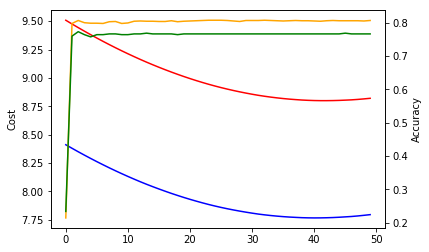

In [44]:
acc_and_cost = result['accuracy and cost']
train_cost = acc_and_cost['train_cost']
train_acc = acc_and_cost['train_acc']
test_cost = acc_and_cost['test_cost']
test_acc = acc_and_cost['test_acc']

fig = plt.figure()
 
ax1 = fig.add_subplot(111)
ax1.plot(range(len(train_cost)), train_cost, color='red')
ax1.plot(range(len(test_cost)), test_cost, color='blue')
ax1.set_ylabel('Cost')

ax2 = ax1.twinx()
ax2.plot(range(len(train_acc)), train_acc, color='orange')
ax2.plot(range(len(test_acc)), test_acc, color='green')
ax2.set_ylabel('Accuracy')

The predict value is 6, the real digit is 1


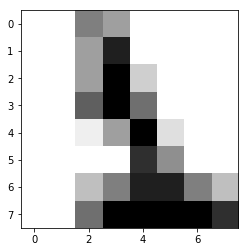

In [45]:
predict(X_test[99], y_test[99])

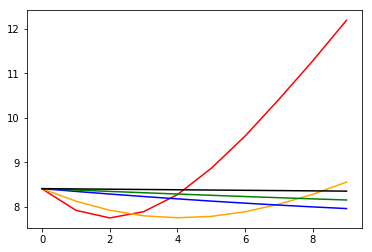

In [61]:
# learning rate graph1
lrs = [1e-5, 1e-5 / 2, 1e-6, 1e-6 / 2, 1e-7]
colors = ['red', 'orange', 'blue', 'green', 'black']
for lr, c in zip(lrs, colors):
    cost = digits_recognization(X_train, y_train_, X_test, y_test_, 1000, lr, False)[0]['accuracy and cost']['test_cost']
    plt.plot(range(len(cost)), cost, color=c)

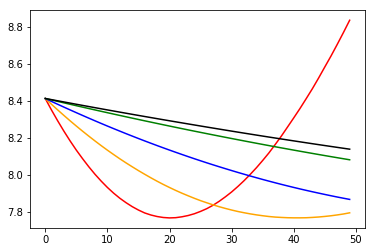

In [63]:
# increase the iteration times
# learning rate graph1
lrs = [1e-6, 1e-6 / 2, 1e-6 / 4, 1e-6 / 8, 1e-7]
colors = ['red', 'orange', 'blue', 'green', 'black']
for lr, c in zip(lrs, colors):
    cost = digits_recognization(X_train, y_train_, X_test, y_test_, 5000, lr, False)[0]['accuracy and cost']['test_cost']
    plt.plot(range(len(cost)), cost, color=c)

# Congratulations ! You have completed assigment 4. 